In [1]:
import os
import random

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from dataclasses import dataclass
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
plt.figure(figsize=[20,5])
num_rows = 10
num_columns = 10
for i in range (num_rows,num_columns):
    ax=plt.subplot(num_rows,num_columns, i+1)
    plt.imshow(x_train[i:,:])
    plt.axis("off")

<Figure size 2000x500 with 0 Axes>

In [5]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
print("Original Integer Label before: ", y_train[0])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("After conversion to one hot encoded data will be: ", y_train[0])

Original Integer Label before:  [6]
After conversion to one hot encoded data will be:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int=500
    BATCH_SIZE: int=256
    LEARNING_RATE: float=0.001

In [7]:
def cnn_model_dropout (input_shape=(32,32,3)):
    model=Sequential()
    
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [8]:
model_dropout=cnn_model_dropout()
model_dropout.summary()

c:\Users\dhika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_dropout.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy','categorical_crossentropy']
)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=60, 
    min_delta=0.001,
    verbose=1,
    mode='min'
)

history = model_dropout.fit(
    x_train, y_train,
    batch_size=TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_split=.30,
    callbacks=[checkpoint_callback,early_stopping_callback]
)

Epoch 1/500
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.2577 - categorical_crossentropy: 2.0253 - loss: 2.0253
Epoch 1: val_loss improved from inf to 2.36498, saving model to best_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 172ms/step - accuracy: 0.2579 - categorical_crossentropy: 2.0247 - loss: 2.0247 - val_accuracy: 0.2163 - val_categorical_crossentropy: 2.3650 - val_loss: 2.3650
Epoch 2/500
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.3503 - categorical_crossentropy: 1.7840 - loss: 1.7840
Epoch 2: val_loss improved from 2.36498 to 1.56935, saving model to best_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.3505 - categorical_crossentropy: 1.7835 - loss: 1.7835 - val_accuracy: 0.4266 - val_categorical_crossentropy: 1.5694 - val_loss: 1.5694
Epoch 3/500
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4174 - categorical_crossentropy: 1.5888 - loss: 1.5888
Epoch 3: val_loss improved from 1.56935 to 1.47023, saving model to best_m

In [22]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 60])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

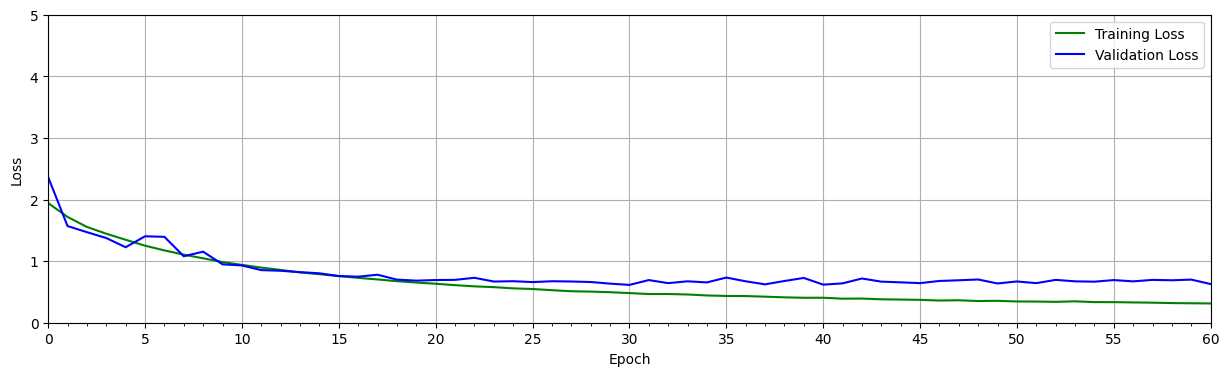

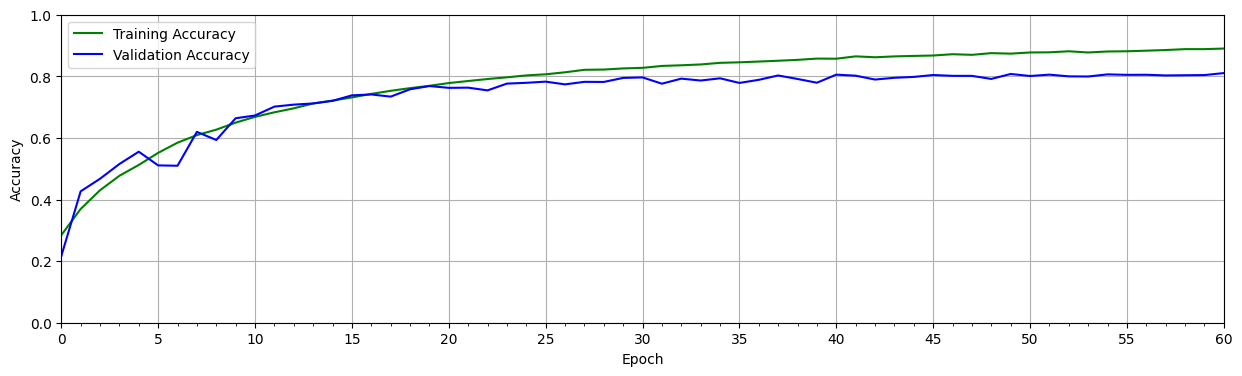

In [13]:

train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [14]:
results = model_dropout.evaluate(x_test, y_test)
print("Results:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8100 - categorical_crossentropy: 0.7350 - loss: 0.7350
Results: [0.7330085635185242, 0.8101000189781189, 0.7330085635185242]


In [15]:
loss, categorical_crossentropy, accuracy = model_dropout.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8100 - categorical_crossentropy: 0.7350 - loss: 0.7350
Test accuracy: 73.301


In [16]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 5
    num_cols = 6

    data_batch = dataset[0 : num_rows * num_cols]

    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction accuracy:  0.8


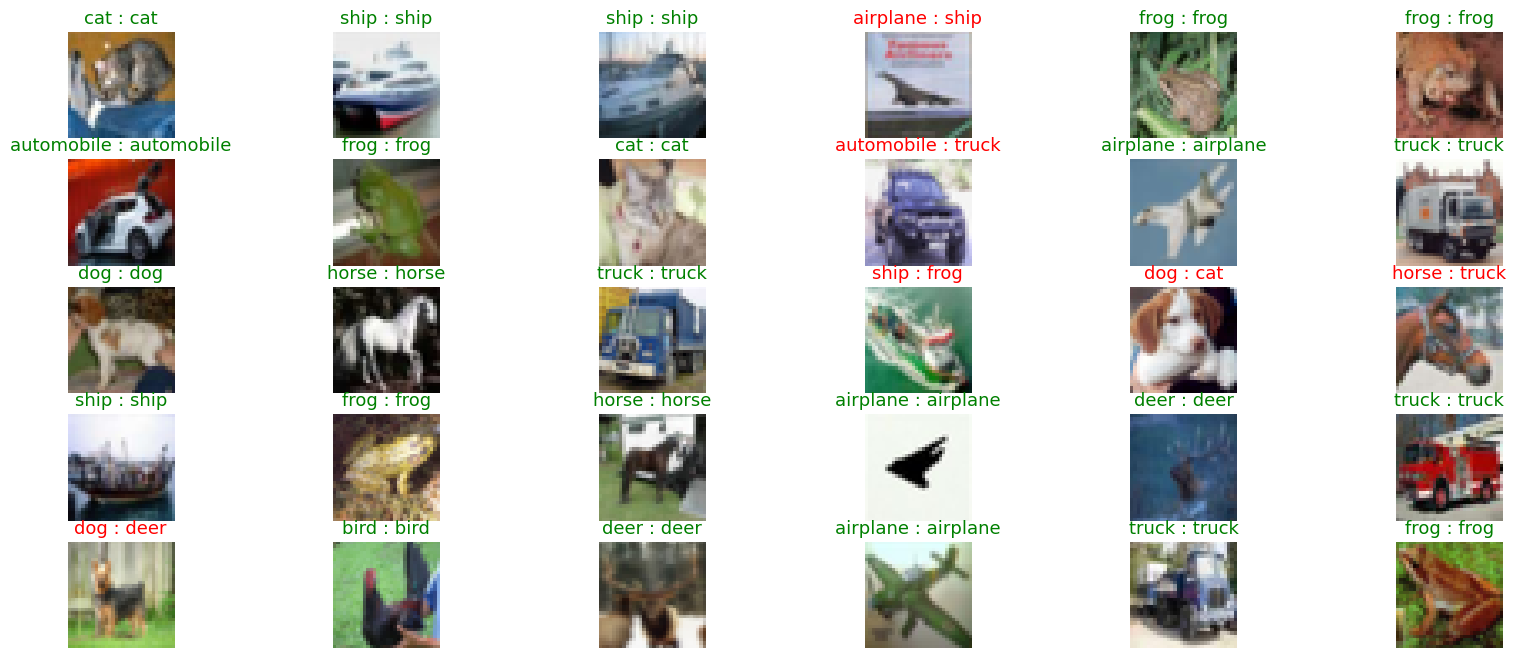

In [17]:
evaluate_model(x_test, model_dropout)

In [18]:
predictions = model_dropout.predict(x_test)
predicted_labels=[np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
y_test_integer=tf.argmax(y_test,axis=1)
cm=tf.math.confusion_matrix(labels=y_test_integer,predictions=predicted_labels)
plt.figure(figsize=[20,8])

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

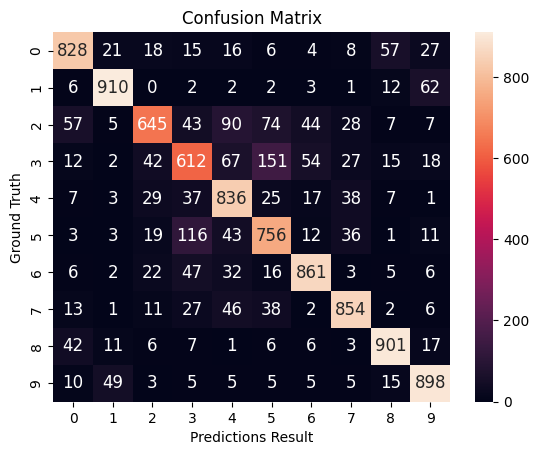

In [20]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':12})
plt.xlabel("Predictions Result")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted class is: truck
The category class is: vehicle


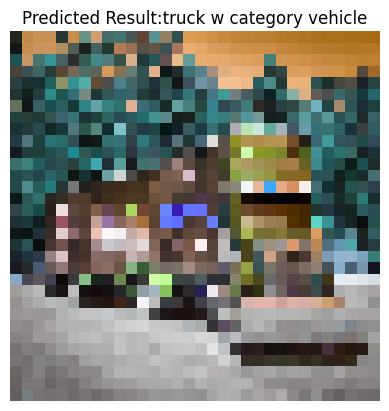

In [48]:
import cv2
import numpy as np

original_img = cv2.imread(r"C:\Users\dhika\Downloads\truck.jpg")

img = cv2.resize(original_img, (32, 32))

img = img / 255.0

img = np.expand_dims(img, axis=0)

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

class_categories = {
    "vehicle" : ['airplane','automobile','ship','truck'],
    "animal" : ['bird','cat','deer','dog','frog','horse']
}

predictions = model_dropout.predict(img)

predicted_class = np.argmax(predictions, axis=1)

print(f'The predicted class is: {class_names[predicted_class[0]]}')
for category, classes in class_categories.items():
    if class_names[predicted_class[0]] in classes:
        print(f'The category class is: {category}')
        img = img.squeeze()  
        plt.axis('off')
        plt.title(f'Predicted Result:{class_names[predicted_class[0]]} & category {category}')
        plt.imshow(img)
        plt.show()
        break
